# Investigate a Dataset: Medical Appointment No-Shows   

## Table of Contents
1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions
 

##### Introduction
As someone who has worked in a variety of medical settings, medical no-shows can often be a daily occurrence, often happening multiple times daily. Why might people be apt to skip on their medical appointments. Reasons may include staying late at work, conflicting appointments, traffic, perceived lack of time, laziness, or other reasons not mentioned. The data set I have selected for analysis consists of over 100,000 medical appointments in Brazil. The focus on this dataset is determining which characteristics are likely to increase the likelihood an individual will no-show for their medical appointment and making an observation of such trends. The following characteristics of the original dataset are displayed below in the following chart.

|Column Name|Description|
| ------- | ----------- |
|Patientid |Patient identification|
|AppointmentID|Identification of each appointment|
|Gender|  ('M') Male or ('F') Female|
|ScheduledDay|Date which patient set up the appointment|
|AppointmentDay|Date of the actual appointment|
|Age|Age of the patient at the time of appointment|
|Neighborhood|The location of the hospital|
|Scholarship|'Bolsa Familia' welfare program|
|Hypertension|Indicates if the patient has hypertension|
|Diabetes|Indicates if the patient has diabetes|
|Alcoholism|Indicates if the person is an alcoholic|
|Handcap|Indicates if the patient is handicapped|
|SMS_received|One or more messages sent to the patient|
|No_show|'No' if the patient showed up for their appointment, and 'Yes' if they no-showed |

The dependent variable in this dataset would be whether or not a patient no-showed. Independent variables can include most of the other columns: age, diabetes, hypertension, handicap, whether any reminders were sent to the patient, among others. The goal of this project will be to answer the following 5 questions.
1. Which gender is more likely to no-show?
2. What ages or age groups are more likely to no-show?
3. Are patients diagnosed with certain medical conditions more likely to show or no-show for their appointments?
Which of these medical conditions are associated with the most no-shows?
4. Are there certain days of the week when patients are more likely to no-show?
5. Does receiving an SMS reduce the chances of a no-show?

The link to the original dataset can be found here: [Link](https://www.kaggle.com/joniarroba/noshowappointments/home)

 

In [1]:
# Importing the Python libraries that will be used in this project
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set(style='darkgrid') # Even if using Matplotlib, using this Seaborn feature should make visual charts more presentable.

 


## Data Wrangling
This will be a two-step process.
1. Determining the general properties of the data and a brief overall summary on the dataset and datatypes being worked with. Each process in this step will be outlined in the cells below.
2. Data cleaning enabling more efficiency when doing exploratory analysis. This will be a much more involved step with each of the processes being described in the cells below as each process is being performed. 


### General Properties

In [2]:
# Loading the data and performing basic operations to inspect the dataset.  
# Inspecting the datatypes, seeing which data is relevant, and inspecting for null values
df= pd.read_csv("C:\\Users\\teamd\\GitHub Projects 3\\no_shows.csv")
# inspecting the first few rows
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Getting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are 110,527 rows and 14 columns in this dataset. The dataset is free of null values. There are some datatypes that will be changed to enable further analysis. PatientId should be an int and not a float since you cannot have a tenth, or hundredth of a patient. The appointmentID column will be dropped since there is most likely no correlation to no-shows and an appointment number. The ScheduledDay and AppointmentDay columns will be set to a date datatype to enable to determine the what day of the week the appointment falls on. The next step is to determine if there are any duplicate rows along with getting an overview of the descriptive statistics of the data set. 

In [4]:
# Getting the total number of duplicate rows
sum(df.duplicated())
 

0

In [5]:
# Acquire some descriptive statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Looking at the descriptive statistics, there are a couple of anomalies in the age column. The first one being that the minimum age is -1 and the second one being that the maximum age in this dataset is 115. An individual cannot be a negative age. It is possible that this could have been a typo. As far as the maximum age, further investigation checking to see how many rows of the dataset consist of patients above 100 years of age may prove useful. If these are isolated incidents, then these rows will be dropped from the dataset. As for the remaining columns and their datatypes that have not been mentioned, no further cleaning of these columns or converting of data types are deemed necessary. In the next set of cells below, the data cleaning process will begin. 

 

### Data Cleaning  
1. Dropping rows with negative age values
2. Dropping rows with age values in excess of 110 
3. Dropping unnecessary columns
4. Converting data types into another data type for easier analysis
5. Renaming the column labels for better consistency

First, dropping any rows with negative age values and checking to see if the maximum age is a single outlier or if there are other rows with higher ages, > 100. If the maximum age is a single outlier and there are very few other rows with ages above 100, then these rows will be dropped. If there are several rows with 100 plus year old patients then the rows including the max will not be dropped. 


In [6]:
# Seeing how many rows have age values less than 0
df[df.Age < 0].shape[0]

1

In [7]:
# Determining the location of the row with the negative value and then dropping it from the dataframe
df.loc[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
# Dropping the row
df.drop(df[df['Age'] < 0].index, inplace = True) 
print(df.shape) # Total rows should be 110526
print(df.Age.min()) # Minimum should be 0 or greater
df[df.Age == 0].shape[0] # Inspecting to see how many rows have patients at 0 years of age.

(110526, 14)
0


3539

There are 3539 rows with patients whose age is listed at zero. Since these could be infants that are from birth to 12 months in age, these rows will be left alone. We are under the assumption that those at a noticeably young age most likely have a caretaker who is responsible for the patient making it to their appointment. Another option is to fill the rows with 0 with the mean age. If it is under the assumption that infants and those at a noticeably young age have a caretaker responsible, then we would end up needing to either delete all rows under a specified age or fill such rows with the mean value. Since there is no clear age at which a patient is responsible for showing to their medical appointment, I find it best to leave the rows included in the dataset.

In [9]:
# Exploring the dataset for rows with high age values, > 100
df[df.Age >= 100].shape[0]

11

In [10]:
df.loc[df['Age'] >= 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762950e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196320e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196320e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196320e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196320e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342840e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578310e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,7.482350e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [11]:
df.drop(df[df['Age'] == 115].index, inplace=True)
print(df.shape) # Should be 110521
df.Age.max() # Should be 102

(110521, 14)


102

After searching the web for the number of people living today who are estimated to be over 110 years of age, the number is quite small. You can check out the following the link that gives a list of how old these individuals are and their location:
[Link](https://en.wikipedia.org/wiki/List_of_the_oldest_living_people)


Looking above at the rows with patients aged 100 and above, there are few who are 100 and a couple who are 102 years old. Considering that not too many people are over 110 years of age and this dataset has five individuals listed as aged 115 years, it can be assumed that this may have been a typo and the value was meant to be 105 years or maybe the 15 years of age. Since we cannot be sure, the rows will be dropped. 

The age column has now been cleaned of possible erroneous age values. The next task is the drop the AppointmentID column 
since that data will not be necessary for this analysis.

In [12]:
# Dropping the AppointmentID column
df.drop('AppointmentID', axis=1, inplace=True)

The next step will be to convert the PatientID column to integer values and both ScheduledDay and AppointmentDay to datetime values.

In [13]:
# Converting the PatientId column to the integer data type
df['PatientId']  = df['PatientId'].astype(int)
 

In [14]:
# Converting both the ScheduledDay and AppointmentDay columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])  
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])  


In [15]:
# Inspecting the dataframe to see that all columns have the correct data types for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110521 non-null int32
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns, UTC]
AppointmentDay    110521 non-null datetime64[ns, UTC]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null object
dtypes: datetime64[ns, UTC](2), int32(1), int64(7), object(3)
memory usage: 11.4+ MB


In [16]:
# First: Dropping the PatientId column as I do not see it as necessary for this analysis 
df.drop('PatientId', axis=1, inplace=True)
df.info() # Column successfully removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns, UTC]
AppointmentDay    110521 non-null datetime64[ns, UTC]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [17]:
# Renaming the column labels for consistency
df_new_labels = ['gender', 'scheduled_day', 'appointment_day', 'age', 'neighborhood', 'scholorship', 'hypertension',
                'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = df_new_labels
df.head(1)

,gender,scheduled_day,appointment_day,age,neighborhood,scholorship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Most of the data cleaning portion of this project is completed. There may continue to be instances where the data must further be trimmed, or data types converted to different data types for easier analysis. 


 

## Exploratory Data Analysis

 

### Research Question 1 Which gender is more likely to no-show?

Getting a general overview and getting some basic statistics through displaying histograms of each of the columns.

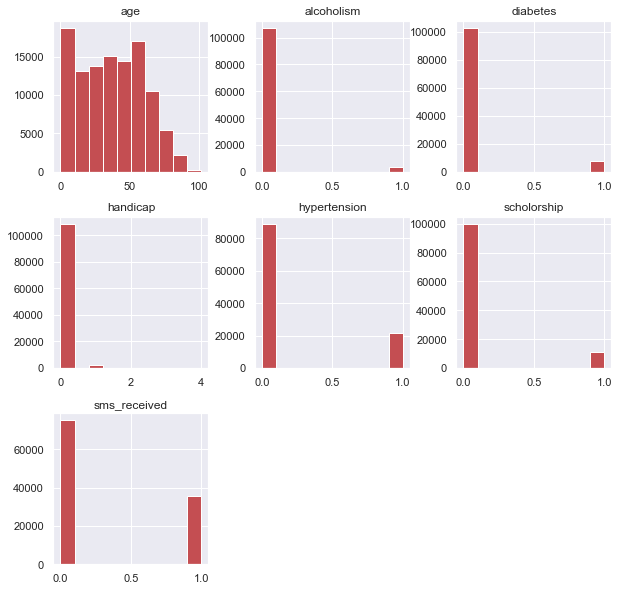

In [18]:
df.hist(figsize = (10, 10), color = 'r'); # Visualizing some general distributions of the data

Looking at the above distribution plots, we can see that hypertension is the most common medical condition that patients had as indicated by the bar over the 1.0 marker. The age distribution plot shows that age 0-10 bin had the highest frequency with the 50 to 60-year bin having the second highest frequency. One distribution that is not shown is the number of people who did not show up for their appointment. Since the 'no_show column consists of string data values, one remedy to have this included in the plot of histograms is to change the data type from a string to an integer. Below, I will change the rows that had 'Yes' indicating a no-show and change it to the integer 1. Those patients who kept their appointment will be indicated with a 0.

In [19]:
# Changing the 'Yes' values to a string value of '1' and 'No' values to a string value of '0'.
df.loc[df['no_show'] == 'Yes', 'no_show'] = '1'
df.loc[df['no_show'] == 'No', 'no_show'] = '0'

In [20]:
df['no_show'] = df['no_show'].astype(int) # Converting from string to integer 

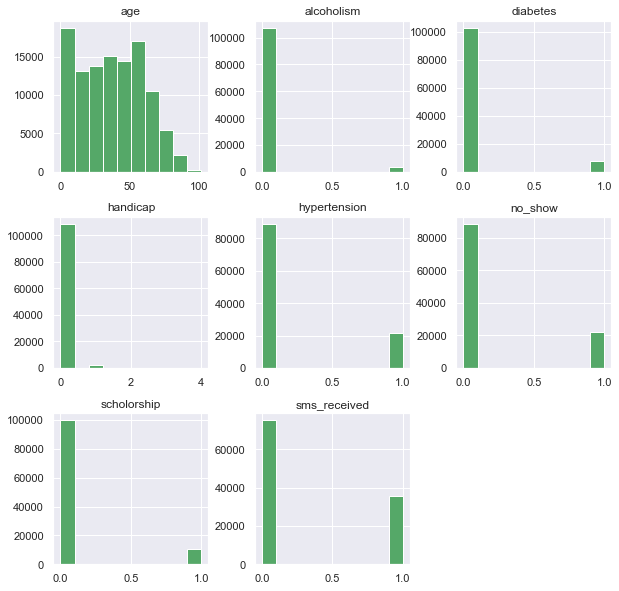

In [21]:
df.hist(figsize = (10, 10), color = 'g');

As shown above in the 'no_show' histogram, there were over 20000 patients who did not show for their appointment. I will further explore what variables were most associated with the those not showing up for their appointment.

38687
71834
110521


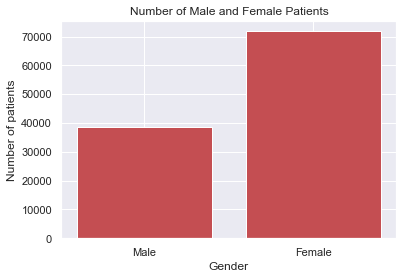

In [22]:
# Determining the proportion and percentage of males and females in the dataset
# Obtaining the number of male and female patients in the dataset
num_male = len(df[df['gender'] == 'M']) # Total number of males
num_female = len(df[df['gender'] == 'F']) # Total number of females
num_total = num_male + num_female # Should total 100521 
print(num_male)
print(num_female)
print(num_total)

# Creating a bar chart to visually represent the number of male and female patients
locations = [1, 2]
heights = [num_male, num_female]
labels = ['Male', 'Female']
plt.bar(locations, heights, tick_label = labels, color = 'r')
plt.title('Number of Male and Female Patients')
plt.xlabel('Gender')
plt.ylabel('Number of patients');
 

The above chart clearly shows there are several thousand more female patients than male patients. It may seem logical to believe that since the numbers for females are much higher, they will have a higher no-show count. This does not necessarily mean female patients are more likely to no-show given this data. A more accurate way to depict who is more likely to no-show is to determine the number of no-shows for each gender and divide it by the total outcome for each gender to come up with a proportion and then multiply the value by 100 to get a percentage value. A good way to begin this process will be to query our data.

In [23]:
# Calculationg the proportion first by querying the females who no-showed
female_prop = df.query('gender == "F" & no_show ==1').shape[0]/ \
df.query('gender == "F"').shape[0]
percent_female = female_prop * 100
print(percent_female)


20.31210847231116


In [24]:
# Percent of male patients who no-showed
# Process will be identical to that used for females
male_prop = df.query('gender == "M" & no_show == 1').shape[0]/ \
df.query('gender == "M"').shape[0]
percent_male = male_prop * 100
print(percent_male)

19.967947889471915


The percentage of each gender not showing up for their appointment are nearly the same, with females only having just a little over three tenths chance greater for no-showing when compared to males

## Plotting the proportions on a bar chart

In [25]:
# Getting counts for each gender and no-show status
gender_counts = df.groupby(['gender', 'no_show']).count()['age']
gender_counts

gender  no_show
F       0          57243
        1          14591
M       0          30962
        1           7725
Name: age, dtype: int64

In [26]:
# Getting the total counts of each gender
gender_totals = df.groupby('gender').count()['age'] # Adding arbitrary column to avoid having the whole dataset print out
gender_totals

gender
F    71834
M    38687
Name: age, dtype: int64

In [27]:
# Determine proportions by dividing gender counts by the total number of gender samples for female
female_proportions = gender_counts['F']/gender_totals['F']
female_proportions

no_show
0    0.796879
1    0.203121
Name: age, dtype: float64

In [28]:
# Applying the same process outlined in the cell above for males
male_proportions = gender_counts['M']/gender_totals['M']
male_proportions

no_show
0    0.800321
1    0.199679
Name: age, dtype: float64

In [29]:
# Setting the x-coordinate location for each resulting group and the width of each bar
ind = np.arange(len(female_proportions)) # The x-location for the groups
width = 0.45 # Width of the bars

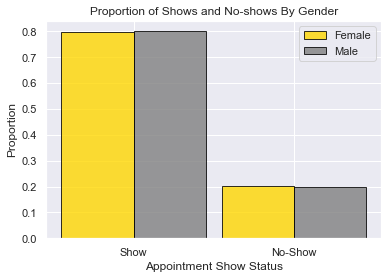

In [30]:
# Plotting the results
female_plot = plt.bar(ind, female_proportions, width, color='gold', edgecolor='black', alpha=.8, label = 'Female')
male_plot = plt.bar(ind + width, male_proportions, width, color='grey', edgecolor='black', alpha=.8, label='Male' )
plt.ylabel('Proportion')
plt.xlabel('Appointment Show Status')
plt.title('Proportion of Shows and No-shows By Gender')
locations = ind + width / 2
labels = ['Show', 'No-Show']
plt.xticks(locations, labels)
plt.legend();

Based on the calculated results and on the diagram pictured above, the proportion of no-shows to shows are nearly identical for both genders. Thus, it could be concluded that gender is not a good predictor as to whether a patient keeps their appointment or not. However, there are limitations to this finding in that this dataset only consists of samples from certain neighborhoods in Brazil, and that such assumptions cannot be applied to the general population of Brazil or to the world as a whole. These findings can suggest that given this geographical location that, men and women are almost equally likely to either show or no-show for their appointment.

 ### Research Question 2: At which ages or age groups are no-shows more likely?

In [31]:
# Using the query function to create two dataframes, one for shows and one for no-shows
# Show dataframe
show = df.query('no_show == 0')
show.mean()

age             37.788753
scholorship      0.093906
hypertension     0.204388
diabetes         0.073839
alcoholism       0.030418
handicap         0.022731
sms_received     0.291333
no_show          0.000000
dtype: float64

In [32]:
# NO-show dataframe
not_show = df.query('no_show == 1')
not_show.mean()

age             34.306820
scholorship      0.115522
hypertension     0.169027
diabetes         0.064080
alcoholism       0.030337
handicap         0.020165
sms_received     0.438430
no_show          1.000000
dtype: float64

The mean age of those who showed to their appointment was 37.79 years and who did not show had an average age of 34.31 years. To get a better idea what age bracket has the most occurrences, I will plot a histogram with a bin setting of 25 to account for ages 0 to 102.



In [33]:
# Creating the variable used to plot the 'show' datapoints by age
ages_show = show['age']
 

In [34]:
# Creating the variable used to plot the 'no-show' datapoints by age
ages_not_show = not_show['age']
 

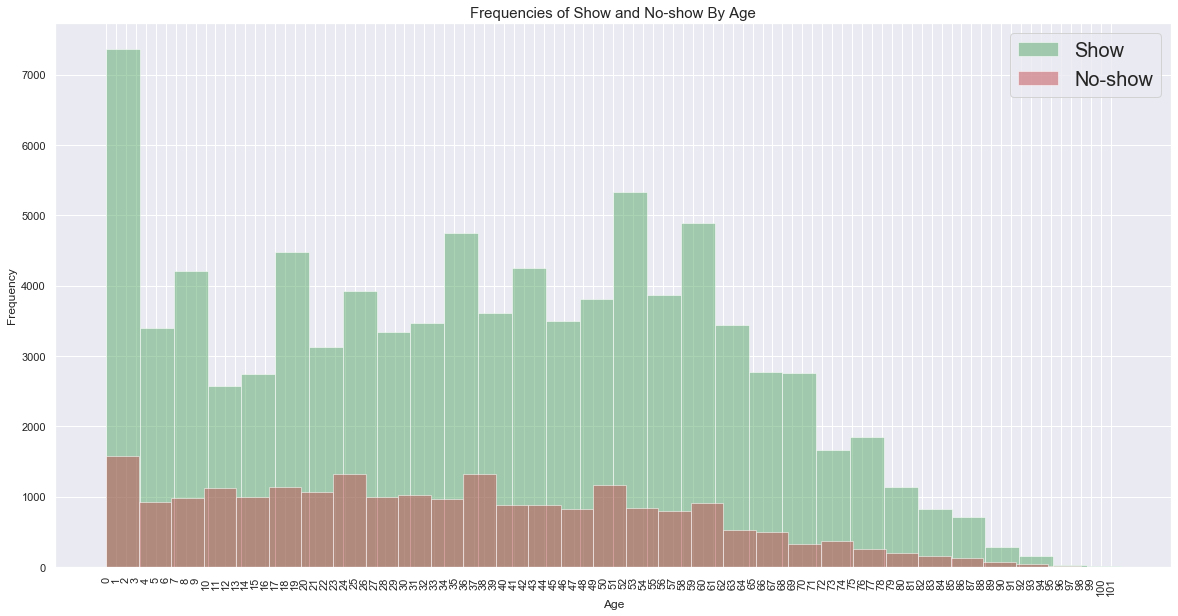

In [35]:
# Overlapping histogram comparing show vs no-show by age
bins = list(range(0,102))
fig, ax=plt.subplots(figsize=(20,10))
ax.hist(ages_show, alpha=.5, bins = 30, label = 'Show', color = 'g')
ax.hist(ages_not_show, alpha=.5, bins = 30, label = 'No-show', color = 'r')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc = 'upper right', fontsize = 20)
plt.xticks(bins, rotation=90)
plt.title('Frequencies of Show and No-show By Age', fontsize=15)
plt.show()


* The overlapping histogram above shows that there are certain age ranges that had a higher frequency of no-showing compared to other age ranges. 
* Aside from patients who more than likely had a caretaker responsible for the patient arriving to their scheduled appointment, the 36-39 age group appears to have greatest frequency in no-shows, closely followed by the 23 to 26-year age range. 
* The other two age groups having a higher frequency of no-shows are those in the 49-52 year and 59 to 62-year age bracket. 
* As for the other age brackets, there does appear to be a general decline in the number of no-shows past the age of 20. 
* It should be noted that higher frequency of no-shows may be correlated with the higher number of overall appointments for each age. 
* To get a better idea if age is correlated to no-showing, finding out the proportion of those at each age who scheduled an appointment and comparing the rate at which the number of patients at each age showed vs did not show for their appointment.

The code cells below will be used to determine a percentage for each age that did not show for their medical appointment. This will be done by figuring out the total number of appointments made within each age, and then dividing the number of no-shows for each appointment by the total number of booked appointments for each age.

In [36]:
age_counts = df.groupby(['age', 'no_show']).count()['gender']
age_counts.head() # Use head() function to avoid printing the long results set

age  no_show
0    0          2900
     1           639
1    0          1858
     1           415
2    0          1366
Name: gender, dtype: int64

In [37]:
age_totals = df.groupby(['age']).count()['gender']
age_totals.head()

age
0    3539
1    2273
2    1618
3    1513
4    1299
Name: gender, dtype: int64

In [38]:
age_proportions = age_counts/age_totals
age_proportions.tail(10)
# Toggling between using head() and tail() will let me know if the values I want to select in my lists below match up.

age  no_show
95   1          0.250000
96   0          0.941176
     1          0.058824
97   0          0.818182
     1          0.181818
98   0          0.833333
     1          0.166667
99   0          1.000000
100  0          1.000000
102  0          1.000000
Name: gender, dtype: float64

In order to see if there is any correlation between age and a no-show. I will want to create a bar chart with the percentage values on the y-axis and age on the x-axis. In order to do this, I am going to use the 'age_proportions' Pandas Series that I created above and create a list of only no_show proportion values. I will first append all the values in the series and then create another list extracting only the no-show proportion values from the first list I create. Once the list is created, I will convert this list into a Numpy array and construct another array using the values 0 to 102 for the ages and use these two arrays to plot the bar chart.

In [39]:
# Checking to see what the oldest age that has a value of 1 in the no_show column
df.query('age > 90 & no_show == 1')

,gender,scheduled_day,appointment_day,age,neighborhood,scholorship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
969,F,2016-04-15 09:36:46+00:00,2016-04-29 00:00:00+00:00,98,BONFIM,0,1,0,0,0,0,1
3191,M,2016-04-27 12:50:21+00:00,2016-04-29 00:00:00+00:00,92,SANTOS DUMONT,0,1,0,0,0,0,1
5096,M,2016-05-25 14:33:21+00:00,2016-05-31 00:00:00+00:00,91,SANTA LÚCIA,0,1,0,0,0,1,1
13769,F,2016-05-06 11:42:11+00:00,2016-05-10 00:00:00+00:00,91,ESTRELINHA,0,1,0,0,0,1,1
15284,F,2016-04-28 10:30:52+00:00,2016-05-30 00:00:00+00:00,92,JESUS DE NAZARETH,0,1,0,0,0,0,1
16376,M,2016-05-04 10:51:28+00:00,2016-05-24 00:00:00+00:00,93,TABUAZEIRO,0,1,0,0,0,0,1
16408,M,2016-05-04 10:51:28+00:00,2016-05-24 00:00:00+00:00,93,TABUAZEIRO,0,1,0,0,0,1,1
19562,F,2016-05-06 15:23:39+00:00,2016-05-12 00:00:00+00:00,91,CARATOÍRA,0,1,0,0,0,0,1
21171,F,2016-05-18 06:37:34+00:00,2016-05-20 00:00:00+00:00,92,BARRO VERMELHO,0,1,0,0,0,0,1
27740,F,2016-04-29 10:04:31+00:00,2016-05-24 00:00:00+00:00,93,MARUÍPE,0,1,0,0,0,0,1


In [40]:
props = [] # Creating a list of all values from the 'age_proportions' Pandas Series 
for value in age_proportions:
    props.append(value)   
 

In [41]:
props_no_show = props[1:199:2] # Extracting only the values indicative of the no-show proportions up to age 98
# Patients aged 99 and over did not have any no-shows.

In [42]:
# Converting the 'props' list into an array
props_array= np.array(props_no_show)
props_array

percentages = props_array * 100 # Creating an array with percent values
percentages

array([18.05594801, 18.25780906, 15.57478368, 18.30799736, 21.70900693,
       21.49093351, 20.77580539, 21.09320252, 22.33146067, 26.53061224,
       23.86185243, 20.66945607, 24.90842491, 27.4705349 , 28.2647585 ,
       26.58959538, 25.17831669, 26.24254473, 23.53732347, 25.50161812,
       24.70424495, 24.44903581, 25.50872093, 25.42624166, 25.84541063,
       26.42642643, 24.31800468, 23.89251997, 22.9281768 , 23.52102637,
       24.26035503, 22.23766505, 21.99335548, 22.83464567, 21.10091743,
       20.9724238 , 21.7721519 , 20.67840835, 19.64395335, 22.13541667,
       21.46932953, 22.88261516, 20.83333333, 22.99107143, 21.72158709,
       17.54989677, 19.38356164, 19.15351506, 19.37097927, 18.03874092,
       18.04091754, 18.05998724, 17.01030928, 19.32162326, 17.51633987,
       18.03508772, 16.08562691, 17.34248284, 17.22260041, 16.4408867 ,
       16.72572644, 14.89203276, 16.15853659, 13.02765648, 13.67392938,
       15.16802906, 15.0800337 , 15.21068859, 16.69960474, 14.18

In [43]:
age_array = np.arange(0, 99) # Creating the age array to be used on the x-axis of the bar graph
age_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

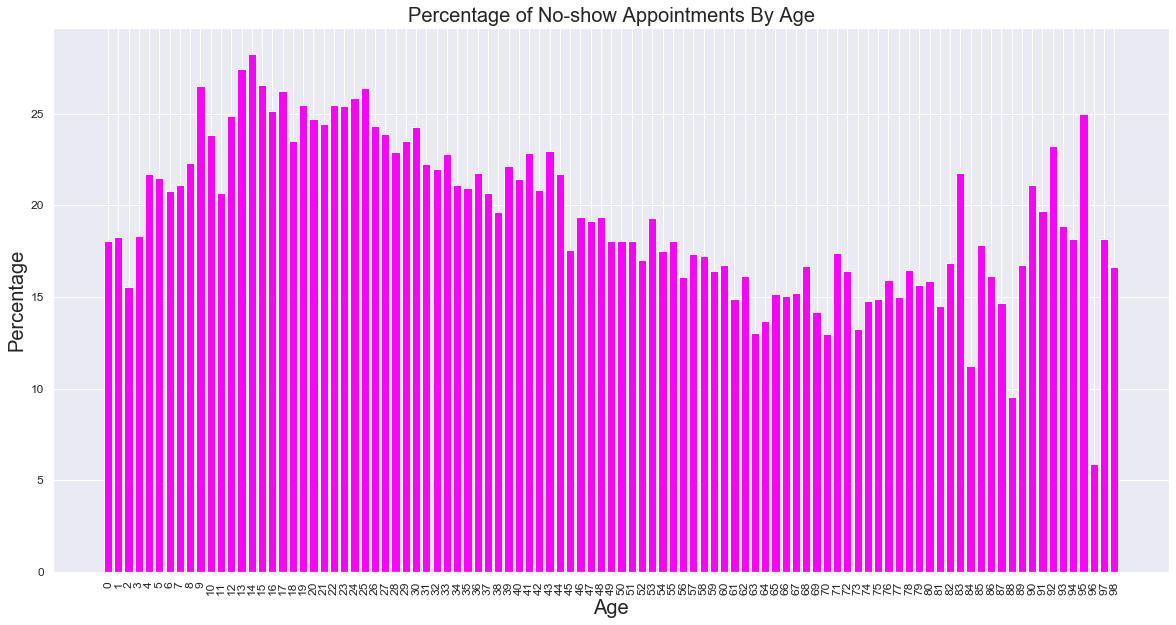

In [44]:
bins2 = list(range(0, 99)) # Creating a variable used to place 'xticks' values
fig, ax_b=plt.subplots(figsize=(20,10))
ax_b.bar(age_array, percentages, color = 'magenta')
ax_b.set_xlabel('Age', fontsize=20)
ax_b.set_ylabel('Percentage', fontsize=20)
plt.xticks(bins2, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Percentage of No-show Appointments By Age', fontsize=20)
plt.show()
 

* Assuming that those at a certain age are more than likely to no-show without taking into consideration the proportion of no-shows to total appointments can yield inaccurate findings. For example, if a particular age or age group has a much higher amount of total appointment bookings compared to other ages or age groups, then it is likely that ages that have a higher amount of appointment bookings may also yield greater amount of no-shows. 
* The chart above takes into consideration the percentage no-shows for each age. 
* The percentage of no-shows does appear to decrease from the age of 13 on up until the early 80s. 
* One should note that for those in their teens and younger, a caretaker may have been the responsible for the patient showing up to their appointment.
* Past the age of 20, over one quarter of those who missed their appointment ages 22-25 years. 
* The ages with the lowest percentage of missed appointments are those who were 62, 63, 69, 70, 73, 81, 84, 88, 96 years of age with those ages 88, and 96 years taking the top two lowest spots.
* From around the middle 40s, except for some larger percentages in some of the ages past 80, the no-show rate was under 20 percent.
* Given these findings, increase age appears to have a lesser correlation with no-shows

### Research Question 3: What medical conditions are most associated with no-shows?
 

Using the 'not_show' dataframe I created above which includes only patients who didn't show for their appointment, I will assign the number of 'no-show' for each medical condition to a variable using the 'query()' function. The objective is to create a pie chart do determine which medical condition makes up the largest percentages of 'no-shows'.

In [45]:
# Number of no-shows battling alcoholism
alcoholics = not_show.query('alcoholism == 1').count()['age']
alcoholics

677

In [46]:
# Number of no-shows who have a handicap includes those with multiple handicaps.
handicaps = not_show.query('handicap == 1').count()['age']
handicaps

363

In [47]:
# Number of no-shows who have hypertension
hyper = not_show.query('hypertension == 1').count()['age']
hyper

3772

In [48]:
# number of no-shows who have diabetes
diabetics = not_show.query('diabetes == 1').count()['age']
diabetics

1430

In [49]:
# Summing up the four variables defined above
total_conditions = alcoholics + handicaps + hyper + diabetics
total_conditions

6242

### Creating a pie chart to visually represent the analysis of the above variables

In [50]:
# Creating a list of the label names
conditions_list = ['Alcoholism', 'Handicap', 'Hypertensive', 'Diabetic']
# Creating a list consisting of the values calculated above with their corresponding medical condition
num_conditions = [677, 363, 3772, 1430]

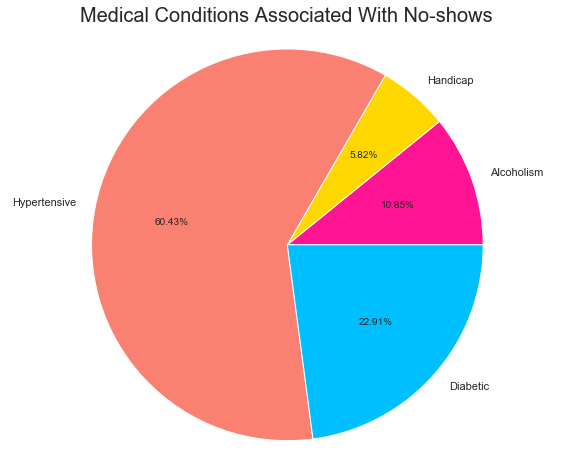

In [51]:
# Creating the pie chart
plt.figure(figsize=(10, 8))
plt.pie(num_conditions, labels=conditions_list, autopct='%1.2f%%', colors=['deeppink', 'gold', 'salmon', 'deepskyblue'])
plt.axis('equal')
plt.title('Medical Conditions Associated With No-shows', fontsize=20)
plt.show()

* Of the four medical conditions that patients may have, approximately 60 percent of the no-shows consisted of patients with hypertension. 
* Nearly 23 percent of patients with a medical condition and who did not show for their appointment were diabetic.
* For those with a medical condition, patients with a handicap made the lowest percentage of no-shows at just below six percent.
* Once again, further analysis involving taking the proportion of those with a medical condition who did not show for their appointment and comparing it to the total number of appointments booked for patients with a given medical condition may yield more granular and accurate results. 
* Further analysis could also include seeing if patients with more than one medical condition are more or less likely to show for their appointment. The same process involving proportions for the other two questions regarding age and gender analyzed above could be applicable to finding out more granular information about whether or not those with certain medical conditions and or having comorbidities are more or less likely to show for their appointment.
* Although nearly 60% of those with a medical condition and who did not show for their appointment had hypertension, this could simply be the result of having hypertension being more widely presented in the given dataset regardless of appointment status.

### Research Question 4: What day of the week is most associated with no-shows?

To determine which day of the week is most associated with no-shows, I will need to create a 'weekday' column that will list whether the appointment was on a Monday, Tuesday, Wednesday, and so forth. In order to do this, I will need to convert the datetime data values into the names of the weekday for the 'weekday' column.  

In [52]:
# Creating a column with weekday names
df['weekday'] = df['appointment_day'].dt.day_name()
weekday_totals = df.groupby('weekday').count()['no_show'].sort_values() 
weekday_totals
# Determining the total number of appointnments for a given day sorted in ascending order

weekday
Saturday        39
Thursday     17245
Friday       19018
Monday       22712
Tuesday      25640
Wednesday    25867
Name: no_show, dtype: int64

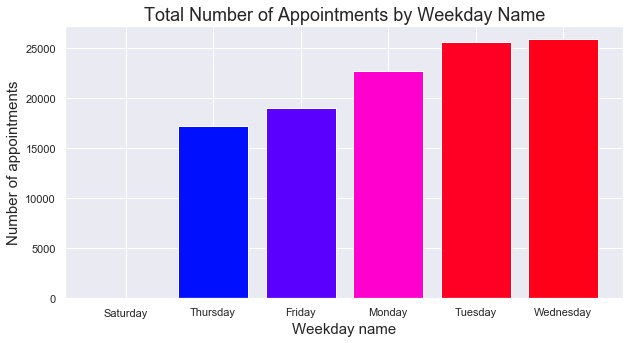

In [53]:
# Using a bar chart to display the above result
plt.figure(figsize=(10, 5))
locations2=[1, 2, 3, 4, 5, 6,]
heights= np.array([39, 17245, 19018, 22712, 25640, 25867])
weekday_labels=['Saturday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday']
colors2 = cm.hsv(heights / float(max(heights)))
plt.bar(locations2, heights, tick_label=weekday_labels, color= colors2)
plt.ylabel('Number of appointments', fontsize=15)
plt.xlabel('Weekday name', fontsize=15)
plt.title('Total Number of Appointments by Weekday Name', fontsize=18);


* Wednesday has the greatest amount of scheduled appointments, closely followed by Tuesday.
* Aside from Saturday with only 93 appointments, Thursday and Friday totals were below 20,000.

The same steps performed above will be used to display the number of shows only for each day of the week.

In [54]:
# Creating a second version of the 'show' dataframe which includes the added 'weekday' column
show_v2 = df.query('no_show == 0')


In [55]:
# Creating a Pandas Series of appointments where patients did show to be used in the bar plot below
weekday_totals_show = show_v2.groupby('weekday').count()['no_show'].sort_values()
weekday_totals_show

weekday
Saturday        30
Thursday     13909
Friday       14981
Monday       18023
Tuesday      20488
Wednesday    20774
Name: no_show, dtype: int64

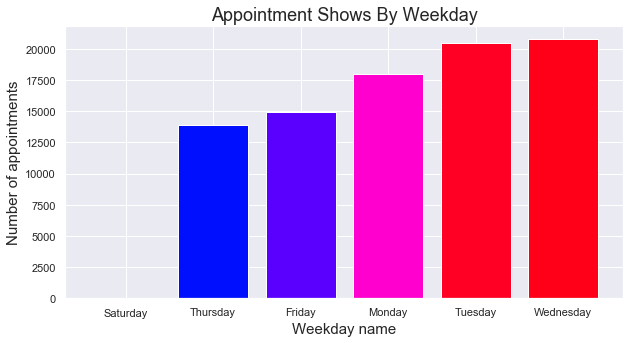

In [56]:
# Bar graph depicting appointments in which the patient showed
plt.figure(figsize=(10, 5))
locations2=[1, 2, 3, 4, 5, 6,]
heights2= np.array([30, 13909, 14981, 18023, 20488, 20774])
weekday_labels2=['Saturday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday']
colors2 = cm.hsv(heights / float(max(heights)))
plt.bar(locations2, heights2, tick_label=weekday_labels2, color= colors2)
plt.ylabel('Number of appointments', fontsize=15)
plt.xlabel('Weekday name', fontsize=15)
plt.title('Appointment Shows By Weekday', fontsize=18);

* The number of patients showing up for their appointments follows a nearly identical pattern when inclusive of all the data.


The next step is determining the number of 'no-shows' for a given day of the week.

In [57]:
not_show_v2 = df.query('no_show == 1') # Extracting the rows with 1, which is indicative of a patient no-showing
weekday_totals_not_show = not_show_v2.groupby('weekday').count()['age'].sort_values()
weekday_totals_not_show

weekday
Saturday        9
Thursday     3336
Friday       4037
Monday       4689
Wednesday    5093
Tuesday      5152
Name: age, dtype: int64

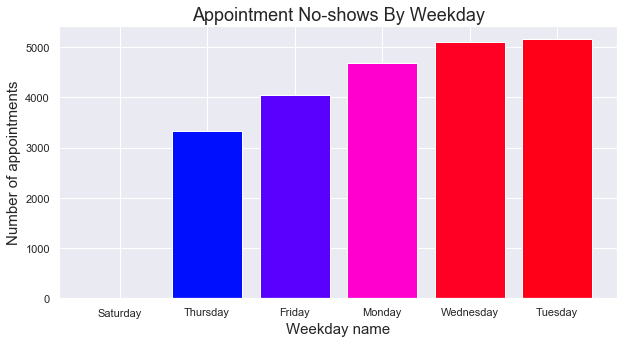

In [58]:
# Bar graph depicting no-shows for each day of the week
plt.figure(figsize=(10, 5))
locations2=[1, 2, 3, 4, 5, 6,]
heights3= np.array([9, 3336, 4037, 4689, 5093, 5152])
weekday_labels3=['Saturday', 'Thursday', 'Friday', 'Monday', 'Wednesday', 'Tuesday']
colors2 = cm.hsv(heights / float(max(heights)))
plt.bar(locations2, heights3, tick_label=weekday_labels3, color= colors2)
plt.ylabel('Number of appointments', fontsize=15)
plt.xlabel('Weekday name', fontsize=15)
plt.title('Appointment No-shows By Weekday', fontsize=18);

* It looks like the number of no-shows is mostly associated with the days of the week with the highest number of appointments.
* The one change in the order is Tuesday having the greatest number of no-shows, whereas, Wednesday had the highest number of shows
* To get a better idea if no-shows are correlated with a particular day/s of the week will be to follow the steps done with gender and ages and figure out the proportion no-shows to all appointments for each day of the week.

In [59]:
# Acquiring 'show' and 'no-show' counts for each day of the week
weekday_counts = df.groupby(['weekday', 'no_show']).count()['gender'] 
weekday_counts

weekday    no_show
Friday     0          14981
           1           4037
Monday     0          18023
           1           4689
Saturday   0             30
           1              9
Thursday   0          13909
           1           3336
Tuesday    0          20488
           1           5152
Wednesday  0          20774
           1           5093
Name: gender, dtype: int64

In [60]:
# Acquiring the total count for each day of the week
weekday_totals2 = df.groupby('weekday').count()['gender']
weekday_totals2 # Adding the 2 at the end as to not get confused with the weekday_totals variable created above
# The other weekday_totals variable was ordered

weekday
Friday       19018
Monday       22712
Saturday        39
Thursday     17245
Tuesday      25640
Wednesday    25867
Name: gender, dtype: int64

In [61]:
# Calculationg the proportions by dividing the number of 'shows' and 'no-shows' by the total number of appointments
weekday_proportions = weekday_counts/weekday_totals2 
weekday_proportions
 

weekday    no_show
Friday     0          0.787727
           1          0.212273
Monday     0          0.793545
           1          0.206455
Saturday   0          0.769231
           1          0.230769
Thursday   0          0.806553
           1          0.193447
Tuesday    0          0.799064
           1          0.200936
Wednesday  0          0.803108
           1          0.196892
Name: gender, dtype: float64

### Plotting the proportions for each day of the week using a bar chart

In [62]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# Creating two lists consisting of the proportion values, one for shows and one for no-shows
# Matching the corresponding proportion values to the corresponding weekday in 'weekday_names'
show_proportions = [0.793545, 0.799064, 0.803108, 0.806553, 0.787727, 0.769231]
no_show_proportions = [0.206455, 0.200936, 0.196892, 0.193447, 0.212273,  0.230769]



In [63]:
# Using list comprehension technique to make side by side bar plot
def create_x(t, w, n, d):
    '''
    n: Which dataset it is currently for
    t: Total number of datasets to graph side-by-side
    d: The number of bars per data set
    w: Width of each individual bar
    function returns a list comprehension generating a set of x-values
     
    '''
    return [t*x + w*n for x in range(d)]

In [64]:
# Generating the sets of x-values
show_x = create_x(2, 0.8, 1, 6) 
no_show_x = create_x(2, 0.8, 2, 6)

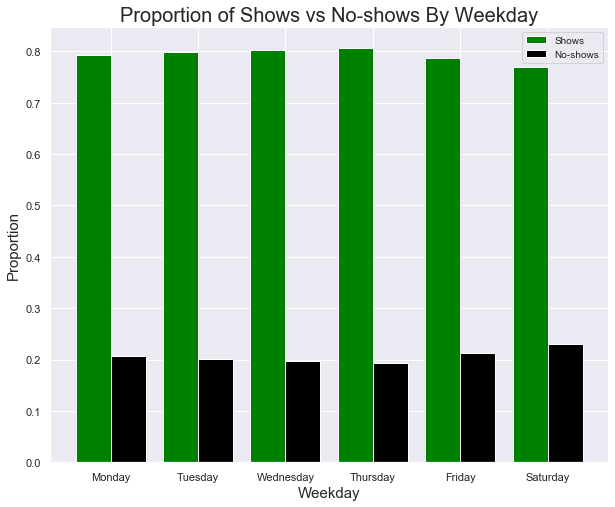

In [65]:
# Plotting the proportions by weekday bar chart
fig, ax_c=plt.subplots(figsize=(10,8)) # using different 'ax' variable name to avoid getting warning message
plt.bar(show_x, show_proportions, color='green')
plt.bar(no_show_x, no_show_proportions, color='black')
middle_x = [(a+b) / 2.0 for a,b in zip(show_x, no_show_x)] # Sets the x-tick marker in the middle of the label
ax_c.set_xticks(middle_x)
ax_c.set_xticklabels(weekday_names)
plt.title('Proportion of Shows vs No-shows By Weekday', fontsize=20)
plt.ylabel('Proportion', fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.legend(['Shows', 'No-shows'], fontsize=10);

           

* When factoring in the proportions, Saturday had the highest proportion of patients not showing up for their appointment.
* Friday had the next highest proportion of no-shows.
* Wednesday and Thursday had the lowest proportions of no-shows, with Thursday slightly leading over Wednesday.
* This could be indicative of people more likely to no-show their appointments on Fridays and even more so if they occur on a weekend day as demonstrated above with the Saturday proportional values.

### Research question 5: Does receiving an SMS reduce the number of no-shows?

In [66]:
# Determine the number of patients who received SMS
yes_sms = df.query('sms_received == 1').count()['gender']
yes_sms



35481

In [67]:
# Number of patients who did not receive an SMS message
no_sms = df.query('sms_received == 0').count()['gender']
no_sms

75040

In [68]:
# Percentage of patients who received an SMS message
(yes_sms/(yes_sms + no_sms)) * 100

32.10340116357977

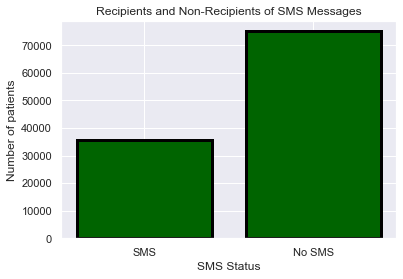

In [69]:
# Bar chart displaying those who got an SMS message and those who did not
locations = [1, 2]
heights4 = [yes_sms, no_sms]
labels4 = ['SMS', 'No SMS']
plt.bar(locations, heights4, tick_label = labels4, color = 'darkgreen', edgecolor='black', linewidth='3')
plt.title('Recipients and Non-Recipients of SMS Messages')
plt.xlabel('SMS Status')
plt.ylabel('Number of patients');
 

* Only about 32.1% of patients received a reminder for their appointment.
* The bar graph above shows the large contrast between the number of SMS recipients and those who did not receive an SMS message, nearly a 40,000 patient difference.

 Variables will be created in order to be used in a bar graph to depict if not receiving an SMS message is associated with no-shows.

In [70]:
# Acquiring the 'show' and 'no-show' counts for each of the two SMS statuses
sms_counts = df.groupby(['sms_received', 'no_show']).count()['age']
sms_counts

sms_received  no_show
0             0          62508
              1          12532
1             0          25697
              1           9784
Name: age, dtype: int64

In [71]:
# Acquiring the total amount of those receiving and not receiving an SMS message
sms_totals = df.groupby('sms_received').count()['age']
sms_totals

sms_received
0    75040
1    35481
Name: age, dtype: int64

In [72]:
# Calculating the proportion values for those who received an SMS message
sms_prop = sms_counts[1]/sms_totals[1]
sms_prop

no_show
0    0.724247
1    0.275753
Name: age, dtype: float64

In [73]:
# Calculating the proportion values for those who did not receive an SMS message
no_sms_prop = sms_counts[0]/sms_totals[0]
no_sms_prop

no_show
0    0.832996
1    0.167004
Name: age, dtype: float64

In [74]:
# Setting the x-coordinate location for each resulting group and the width of each bar
ind2 = np.arange(len(sms_prop)) # The x-location for the groups
width = 0.45 # Width of the bars

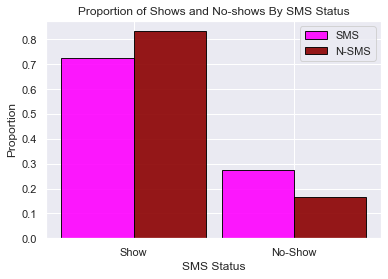

In [75]:
# Plotting a bar graph to depict which group proportionally had more no-shows
sms_plot = plt.bar(ind2, sms_prop, width, color = 'magenta', alpha=.9, edgecolor='black', label = 'SMS')
no_sms_plot = plt.bar(ind2 + width, no_sms_prop, width, color = 'darkred', edgecolor='black', alpha=.9, label='N-SMS' )
plt.ylabel('Proportion')
plt.xlabel('SMS Status')
plt.title('Proportion of Shows and No-shows By SMS Status')
locations = ind + width / 2
labels = ['Show', 'No-Show']
plt.xticks(locations, labels)
plt.legend();

* According to the chart above, the proportion of those who no-showed was higher for those who received an SMS message when compared to those who did not receive a message.
* This would seem contrary to the fact that the proportion of no-shows would be lower for those who did receive an SMS message.

## Report summary
1. Conclusions
2. Limitations
3. Areas for further analysis


This project analyzed different variables and how they may associate with an individual showing or not showing for a medical appointment. Although several independent variables were presented in this dataset and each one could have been analyzed with the dependent variable, whether or not a person shows to their appointment, the following five were addressed in this project:
1. The association between gender and no-shows
2. The association of age and no-shows
3. The association of certain medical conditions and no-shows
4. The association of certain days of the week and no-shows
5. The association of whether someone receives an SMS message and no-shows

### Conclusions
* When it comes to gender, the proportion of shows and no-shows for each gender were nearly identical. Thus, it does appear that gender is one independent variable that has minimal to no effect on the dependent variable of whether a patient shows for their appointment.
* Upon calculating the percentages of no-shows for each age, the highest percentage of no-shows were in patients who were in their teens and 20s. With increasing age, the percentage of no-shows went down, and dipped to below 20% for in ages past the middle 40s, with some ages past 60 dipping below the 15% mark. There was an uptick in percentages for some ages past 80 and more so for ages in the 90 plus age range. Thus, people at certain ages, more so before ones 30s, and 40s, may have some effect on whether a patient shows for their appointment.
* Medical conditions that were most represented in those no-showing their appointment were hypertension in which those with this condition and who did not show for their appointment was slightly more than 60%. Diabetics and those who did not show was at nearly 23%. However, there are limitations in this analysis that will be noted in the limitations section down below.
* Analyzing the proportion of no-shows given a certain day of the week, Friday and Saturday had the highest proportion of patients not showing for their appointment. Wednesday and Thursday had lower proportions of patients not showing up for their appointment. One could conclude that no-shows may be more likely on Fridays and especially on Saturdays. 
* Surprisingly when addressing the last question, it turns out a higher proportion of those who no-showed their appointment were patients that received an SMS message. One could assume that receiving a reminder would decrease the probability of not showing up, not the other way around.

### Limitations
* There are other independent variables in this dataset that were not measured against the dependent variable.
* It is possible that some of the other variables including neighborhood, the waiting time between scheduling the appointment and the actual date of appointment, the number of handicaps an individual has, and other variables not addressed in this analysis may have had some correlation with an appointment's show status.
* All questions except for question number three (medical conditions associated with no-shows) took proportions into consideration. 
* Hypertension and diabetes were the two top medical conditions represented in the pie chart depicting which medical condition was most frequent in patients who no-showed. However, it is possible that these two medical conditions were also more widely represented in the dataset compared to other medical conditions. If a certain medical condition is more prevalent in a given sample, then it is possible it will also be more likely to be a condition that a patient has who did not show for their appointment. 
* Regardless of any associations or non-associations with the independent variables and dependent variable, such findings should not be applicable to other samples, say from a different country. Ethnic, cultural, and daily habits, along with punctuality can vary from culture to culture. Even if there were associations between the independent and dependent variables in this sample, it does not mean these associations would be similar in different countries or in different parts of Brazil for that matter. 


### Areas for further analysis
* As mentioned in the limitations section, analysis of the other variables may yield some findings in regarding an appointment status. 
* More granular analysis could involve associating two or more independent variables and seeing the if there are any correlations to an appointment status. For example, further analysis could be done to see if there is an association between a patient having two or more medical conditions and a patient showing or not showing for their appointment. Taking this a step further, one could see if there is any association between an appointment status and a person's age and number of medical conditions they may have. Another example would be to break down the percentages of no-shows by age and gender.
* Using more advanced statistical calculations and or applying various machine learning models may yield some useful insight from this dataset. 
* There is much more granular information that could be derived from this dataset with further analysis.

### Wrap up
* This project addressed five different questions utilizing a dataset consisting of over 100,000 appointments in the country of Brazil.
* To address these questions the following libraries were used:
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn
* Data wrangling and cleaning involved utilizing various Pandas functions to select, delete, update, and insert columns and rows.
* Data exploration involved using various Pandas functions to select data. Matplotlib was used to create a series of bar charts and a pie chart to visualize the findings. Seaborn was mainly used to enhance the charts created using Matplotlib. 
* Markdown cells along with comments in code cells help guide the reader as to the process of the analysis in this project. 

## Resources
* https://stackoverflow.com/
* https://pandas.pydata.org/pandas-docs/stable/index.html#
* https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html
* https://www.geeksforgeeks.org/pandas-tutorial/?ref=leftbar-rightbar